<a href="https://colab.research.google.com/github/soufianeze/MachineLearning2/blob/main/Projet_JEDHA_03_07_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
# Importation des bibliothèques necessaires pour le projet
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict, cross_val_score, cross_validate
from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from scipy.stats import chi2_contingency
from sklearn.metrics import f1_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.model_selection import learning_curve
from sklearn.metrics import recall_score, precision_score
from sklearn import svm
from sklearn import neighbors
import matplotlib.pylab as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
import xgboost as xgb
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import validation_curve
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import svm
import itertools
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

In [73]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd' 
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [74]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [75]:
df=pd.read_csv('gdrive/My Drive/Patient_Survival.csv')

In [68]:
df.shape

(91713, 85)

In [69]:
#col to keep 
col = ['age', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source',
       'icu_type', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis',
       'apache_post_operative', 'arf_apache', 'gcs_eyes_apache',
       'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_mbp_min',
       'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_noninvasive_max',
       'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min',
       'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max',
       'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max',
       'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max',
       'd1_potassium_min', 'apache_4a_hospital_death_prob',
       'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus',
       'hepatic_failure', 'immunosuppression', 'leukemia', 'lymphoma',
       'solid_tumor_with_metastasis', 'apache_3j_bodysystem',
       'apache_2_bodysystem', 'hospital_death']
df = df[col]

In [70]:
# Enelver les NaN
df = df.dropna()

In [8]:
df = df[df.pre_icu_los_days>=0]                                                                                                                                                  
df = df[df.apache_4a_hospital_death_prob>=0]                                               
df = df[df.apache_4a_icu_death_prob>=0]

In [71]:
## Création des datasets target et features
target_name = 'hospital_death'
y = df.loc[:,target_name]
X = df.loc[:,[c for c in df.columns if c!=target_name]] 

In [ ]:
def diagnostique(x):
    if x == "Undefined Diagnoses" or x == "Undefined diagnoses" : 
        x = "Undefined diagnoses or unknown" 
    return x

X['apache_2_bodysystem'] = X['apache_2_bodysystem'].apply(lambda x: diagnostique(x)) 


In [10]:
labelEncoder= LabelEncoder()
X['icu_type'] = labelEncoder.fit_transform(X['icu_type'])
X['ethnicity'] = labelEncoder.fit_transform(X['ethnicity'])
X['apache_3j_bodysystem'] = labelEncoder.fit_transform(X['apache_3j_bodysystem'])
X['gender'] = labelEncoder.fit_transform(X['gender'])
X['icu_admit_source'] = labelEncoder.fit_transform(X['icu_admit_source'])
#X['apache_2_bodysystem'] = labelEncoder.fit_transform(X['apache_2_bodysystem'])

In [11]:
idx = 0
numeric_features = []
numeric_indices = []
categorical_features = []
categorical_indices = []
for i,t in X.dtypes.iteritems():
    if ('float' in str(t)) or ('int' in str(t)) :
        numeric_features.append(i)
        numeric_indices.append(idx)
    else :
        categorical_features.append(i)
        categorical_indices.append(idx)

    idx = idx + 1

print('Found numeric features ', numeric_features,' at positions ', numeric_indices)
print('Found categorical features ', categorical_features,' at positions ', categorical_indices)

Found numeric features  ['age', 'elective_surgery', 'ethnicity', 'gender', 'icu_admit_source', 'icu_type', 'pre_icu_los_days', 'weight', 'apache_2_diagnosis', 'apache_post_operative', 'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache', 'gcs_verbal_apache', 'heart_rate_apache', 'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache', 'ventilated_apache', 'd1_diasbp_min', 'd1_heartrate_max', 'd1_mbp_min', 'd1_resprate_max', 'd1_resprate_min', 'd1_spo2_min', 'd1_sysbp_min', 'd1_temp_max', 'd1_temp_min', 'h1_diasbp_noninvasive_max', 'h1_diasbp_noninvasive_min', 'h1_heartrate_max', 'h1_heartrate_min', 'h1_mbp_noninvasive_max', 'h1_mbp_noninvasive_min', 'h1_resprate_max', 'h1_resprate_min', 'h1_spo2_max', 'h1_spo2_min', 'h1_sysbp_max', 'h1_sysbp_min', 'd1_glucose_max', 'd1_glucose_min', 'd1_potassium_max', 'd1_potassium_min', 'apache_4a_hospital_death_prob', 'apache_4a_icu_death_prob', 'aids', 'cirrhosis', 'diabetes_mellitus', 'hepatic_failure', 'immunosuppression', 'leukemia', '

In [12]:
# Normalization
numeric_transformer = StandardScaler()

# OHE / dummyfication
featureencoder = ColumnTransformer(
    transformers=[    
        ('num', numeric_transformer, numeric_indices)
        ]
    )

X = featureencoder.fit_transform(X)

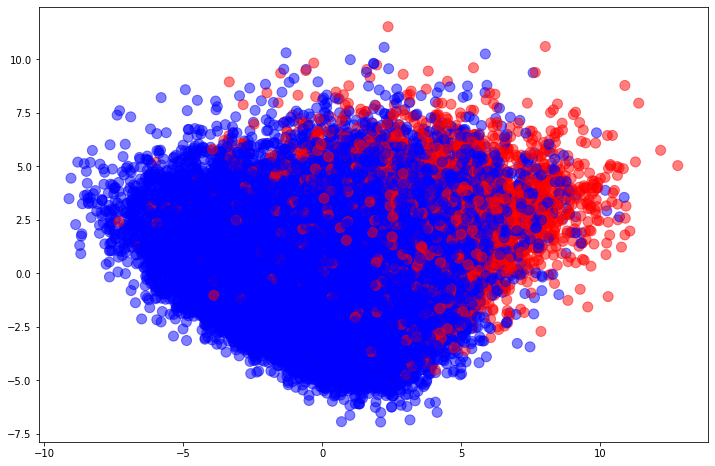

In [13]:
# Visualisation des donnéés 

model = PCA(n_components=2)
model.fit(X)

x_pca = model.transform(X)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y, cmap= 'bwr', s=100, alpha=0.5);

In [59]:
# Division de la data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [60]:
# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator= dtc, n_estimators= 100)
ac.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [62]:
y_pred_train = ac.predict(X_train)

print('F1 score:', f1_score(y_train, y_pred_train))
print('Prcision:',precision_score(y_train, y_pred_train))
print('Recall', recall_score(y_train, y_pred_train))

F1 score: 0.9267621145374448
Prcision: 0.978204010462075
Recall 0.8804603714360449


In [63]:
y_pred_test = ac.predict(X_test)

print('F1 score:', f1_score(y_test, y_pred_test))
print('Prcision:',precision_score(y_test, y_pred_test))
print('Recall', recall_score(y_test, y_pred_test))

F1 score: 0.35764705882352943
Prcision: 0.44837758112094395
Recall 0.2974559686888454


# Logistic Regression




In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Evaluation model on Testing Set

In [16]:
y_pred_train = model.predict(X_train)

print('F1 score:', f1_score(y_train, y_pred_train))
print('Prcision:',precision_score(y_train, y_pred_train))
print('Recall', recall_score(y_train, y_pred_train))

F1 score: 0.3877846042645464
Prcision: 0.6271186440677966
Recall 0.2806696311797018


## Evaluation model on Testing Set

In [17]:
y_pred_test = model.predict(X_test)

print('F1 score:', f1_score(y_test, y_pred_test))
print('Prcision:',precision_score(y_test, y_pred_test))
print('Recall', recall_score(y_test, y_pred_test))

F1 score: 0.3925619834710744
Prcision: 0.6627906976744186
Recall 0.2788649706457926


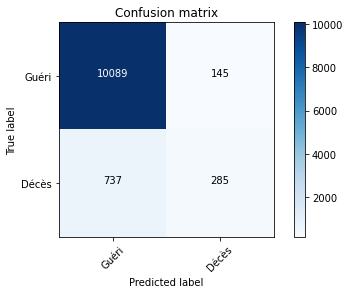

In [18]:
class_names=(['Guéri','Décès'])
cm = confusion_matrix(y_test, y_pred_test)
plot_confusion_matrix(cm,class_names)

## Validation model

[ 3601  3929  4256  4583  4911  5238  5566  5893  6220  6548  6875  7203
  7530  7858  8185  8512  8840  9167  9495  9822 10149 10477 10804 11132
 11459 11787 12114 12441 12769 13096 13424 13751 14078 14406 14733 15061
 15388 15716 16043 16370 16698 17025 17353 17680 18008 18335 18662 18990
 19317 19645 19972 20299 20627 20954 21282 21609 21937 22264 22591 22919
 23246 23574 23901 24228 24556 24883 25211 25538 25866 26193 26520 26848
 27175 27503 27830 28157 28485 28812 29140 29467 29795 30122 30449 30777
 31104 31432 31759 32086 32414 32741 33069 33396 33724 34051 34378 34706
 35033 35361 35688 36016]


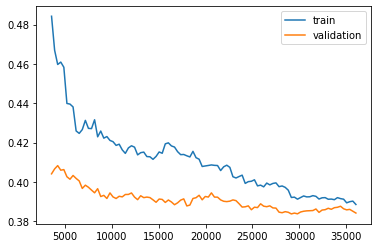

In [26]:
# Learning curve
N, train_score, val_score = learning_curve(model, X_train, y_train,
                                          train_sizes = np.linspace(0.1, 1.0, 100), cv = 5,scoring='f1')
print(N)
plt.plot(N, train_score.mean(axis = 1), label='train')
plt.plot(N, val_score.mean(axis = 1), label='validation')
plt.xlabel= ('train_size')
plt.legend();

## Validation model

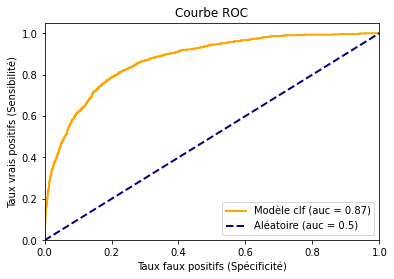

In [25]:
probs = model.predict_proba(X_test)
from sklearn.metrics import roc_curve, auc
fpr, tpr, seuils = roc_curve(y_test, probs[:,1], pos_label=1)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='orange',lw=2, label='Modèle clf (auc = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Aléatoire (auc = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.ylabel('Taux vrais positifs (Sensibilité)')
plt.xlabel('Taux faux positifs (Spécificité)')
plt.title('Courbe ROC')
plt.legend(loc="lower right");


SMOTE

In [28]:
X_smote, y_smote = SMOTE(sampling_strategy=0.90).fit_resample(X_train, y_train)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.2, random_state = 0)

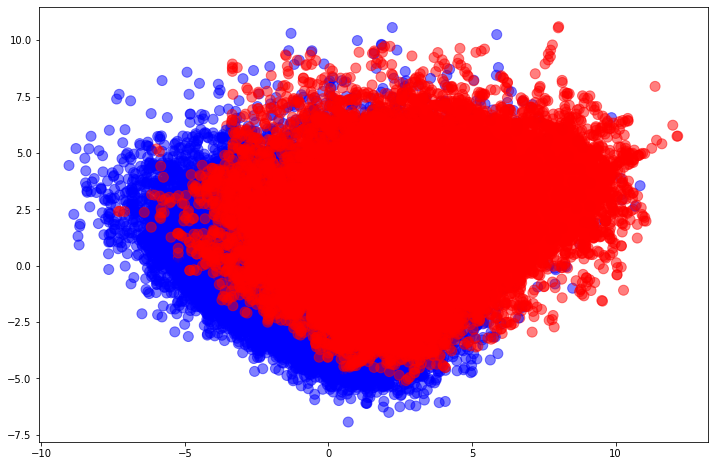

In [31]:
model = PCA(n_components=2)
model.fit(X)

x_pca = model.transform(X_smote)
plt.figure(figsize=(12,8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=y_smote, cmap= 'bwr', s=100, alpha=0.5);

In [34]:
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)

In [35]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=20)
logreg_cv.fit(X_smote,y_smote)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
140 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
140 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Sol

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}


In [37]:
model2=LogisticRegression(C=0.1,penalty="l2")
model2.fit(X_smote,y_smote)

LogisticRegression(C=0.1)

In [41]:
plt=reload(plt)

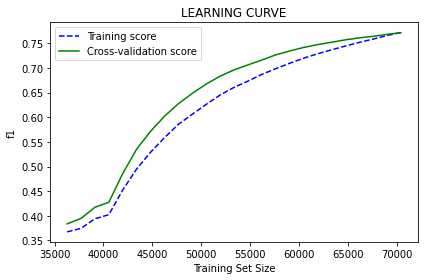

In [42]:
sizes, training_scores, testing_scores = learning_curve(model2, X_smote, y_smote, cv=10, scoring='f1', train_sizes=np.linspace(0.01, 1.0, 50)) 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
plt.title("LEARNING CURVE") 
plt.xlabel("Training Set Size"), plt.ylabel("f1"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show()

In [43]:
y_pred_smote = model2.predict(X_smote)

print('F1 score:', f1_score(y_smote, y_pred_smote))
print('Precision:', precision_score(y_smote, y_pred_smote))
print('Recall:' ,recall_score(y_smote, y_pred_smote))

F1 score: 0.7722254827981331
Precision: 0.8012469189502682
Recall: 0.7452328937076894


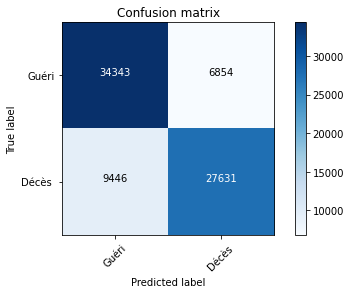

In [44]:
class_names=(['Guéri','Décès '])
cm = confusion_matrix(y_smote, y_pred_smote)
plot_confusion_matrix(cm,class_names)

In [45]:
plt=reload(plt)

[ 6591  7190  7789  8389  8988  9587 10186 10786 11385 11984 12583 13183
 13782 14381 14980 15579 16179 16778 17377 17976 18576 19175 19774 20373
 20972 21572 22171 22770 23369 23969 24568 25167 25766 26366 26965 27564
 28163 28762 29362 29961 30560 31159 31759 32358 32957 33556 34155 34755
 35354 35953 36552 37152 37751 38350 38949 39549 40148 40747 41346 41945
 42545 43144 43743 44342 44942 45541 46140 46739 47338 47938 48537 49136
 49735 50335 50934 51533 52132 52731 53331 53930 54529 55128 55728 56327
 56926 57525 58125 58724 59323 59922 60521 61121 61720 62319 62918 63518
 64117 64716 65315 65915]


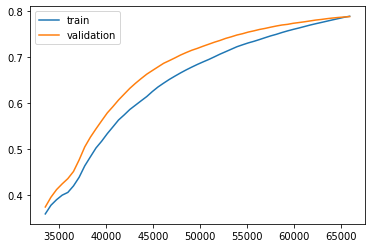

In [ ]:
# Learning curve
N, train_score, val_score = learning_curve(model2, X_smote, y_smote,
                                          train_sizes = np.linspace(0.1, 1.0, 100), cv = 5,scoring='f1')
print(N)
plt.plot(N, train_score.mean(axis = 1), label='train')
plt.plot(N, val_score.mean(axis = 1), label='validation')
plt.xlabel= ('train_size')
plt.legend();

In [46]:
X_smote1, y_smote1 = SMOTE(sampling_strategy='auto').fit_resample(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_smote1, y_smote1, test_size = 0.2, random_state = 0)

In [47]:
# Import des bibliothèques nécessaires
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

In [48]:
# Construction du modèle de classification en utilisant les données d'entraînement
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_smote1, y_smote1)

DecisionTreeClassifier(max_depth=5)

In [49]:
y_pred_smote1 = dtc.predict(X_smote1)

print('F1 score:', f1_score(y_smote1, y_pred_smote1))
print('Precision:', precision_score(y_smote1, y_pred_smote1))
print('Recall:' ,recall_score(y_smote1, y_pred_smote1))

F1 score: 0.8703013508832698
Precision: 0.802058327800194
Recall: 0.9512372414210861


In [50]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

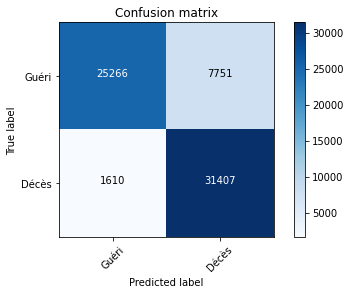

In [51]:
class_names1=(['Guéri','Décès'])
cm1 = confusion_matrix(y_smote1, y_pred_smote1)
plot_confusion_matrix(cm1,class_names1)

In [52]:
X_smote2, y_smote2 = SMOTE(sampling_strategy='auto').fit_resample(X_train, y_train)

X_train, X_test, y_train, y_test = train_test_split(X_smote2, y_smote2, test_size = 0.2, random_state = 0)

In [53]:
# Création du classifier et construction du modèle sur les données d'entraînement
ac = AdaBoostClassifier(base_estimator= dtc, n_estimators= 100)
ac.fit(X_smote2, y_smote2)


AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=5),
                   n_estimators=100)

In [55]:
y_pred_smote2 = ac.predict(X_smote2)

print('F1 score:', f1_score(y_smote2, y_pred_smote2))
print('Precision:', precision_score(y_smote2, y_pred_smote2))
print('Recall:' ,recall_score(y_smote2, y_pred_smote2))

F1 score: 0.9993573507730692
Precision: 0.9999621742255173
Recall: 0.9987532585288451


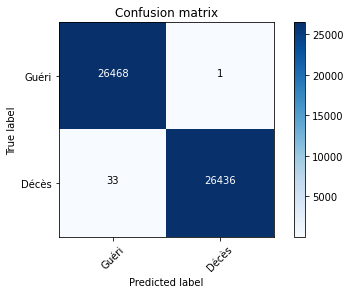

In [56]:
class_names1=(['Guéri','Décès'])
cm1 = confusion_matrix(y_smote2, y_pred_smote2)
plot_confusion_matrix(cm1,class_names1)

In [ ]:
sizes, training_scores, testing_scores = learning_curve(ac, X_smote, y_smote, cv=10, scoring='f1', train_sizes=np.linspace(0.01, 1.0, 50)) 
mean_training = np.mean(training_scores, axis=1) 
Standard_Deviation_training = np.std(training_scores, axis=1) 
mean_testing = np.mean(testing_scores, axis=1) 
Standard_Deviation_testing = np.std(testing_scores, axis=1) 
plt.plot(sizes, mean_training, '--', color="b",  label="Training score") 
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score") 
plt.title("LEARNING CURVE") 
plt.xlabel("Training Set Size"), plt.ylabel("f1"), plt.legend(loc="best") 
plt.tight_layout() 
plt.show();

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1580: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_cl